In [1]:
import fastai
fastai.__version__

ModuleNotFoundError: No module named 'fastai'

In [2]:
from fastai import *
from fastai.vision import *
from fastai.vision.learner import cnn_learner
from fastai.vision import ImageDataBunch, imagenet_stats, get_transforms
from fastai.train import ClassificationInterpretation



In [3]:
my_tfms=get_transforms()
print(f"Transforms on Train set: {my_tfms[0]}")
print('-'*30)
print(f"Transforms on Validation set: {my_tfms[1]}")

Transforms on Train set: [RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, res

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path= Path('../Data'),
                                  train=".", 
                                  valid_pct=0.2,
                                  ds_tfms = my_tfms,
                                  size=224, 
                                  num_workers=4, 
                                  bs = 64).normalize(imagenet_stats)

In [5]:
data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f7bf3803780>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f7bf38d9f28>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f7bfb917ea0>)

In [6]:
print(f"BatchSize: {data.batch_size}")
print(f"Train Dataset size: {len(data.train_ds)}")
print(f"Validataion Dataset size: {len(data.valid_ds)}")
print(f"Classes: {data.classes}")
print(f"Number of Classes : {data.c}")


BatchSize: 64
Train Dataset size: 656
Validataion Dataset size: 164
Classes: ['arts_and_crafts', 'mid-century-modern', 'rustic', 'traditional', 'transitional']
Number of Classes : 5


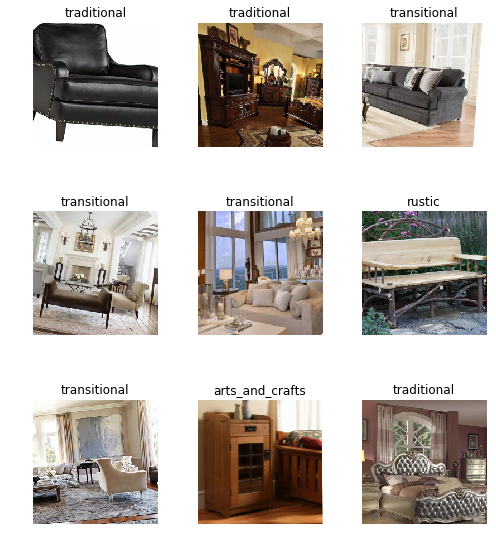

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:

learn = cnn_learner(data,models.resnet34, metrics=error_rate, pretrained=True)


In [9]:

learn.lr_find(num_it=100)
learn.recorder.plot(suggestion=True)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [13]:
# defaults
learn = cnn_learner(data,models.resnet34, metrics=error_rate, pretrained=True,true_wd = True, train_bn = True)
learn.fit(epochs = 10,lr=6.31E-03)
learn.purge()

epoch,train_loss,valid_loss,error_rate,time
0,1.356764,1.215563,0.359756,00:15
1,1.064148,1.083527,0.347561,00:17
2,0.875442,1.281955,0.384146,00:15
3,0.735554,1.234916,0.378049,00:15
4,0.643077,1.271203,0.420732,00:16
5,0.576080,1.267502,0.426829,00:15
6,0.513492,1.562887,0.396341,00:18
7,0.471351,1.519623,0.390244,00:15
8,0.438948,1.626602,0.396341,00:18
9,0.415003,1.317213,0.347561,00:14


In [12]:
# With true_wd = False and train_bn = True
learn = cnn_learner(data,models.resnet34, metrics=error_rate, pretrained=True,true_wd = False, train_bn = True)
learn.fit(epochs = 10,lr=6.31E-03)
learn.purge()

epoch,train_loss,valid_loss,error_rate,time
0,1.447989,1.466482,0.420732,00:16
1,1.146559,1.080940,0.408537,00:14
2,0.973166,0.943775,0.384146,00:15
3,0.839799,0.976832,0.384146,00:16
4,0.723578,0.924276,0.329268,00:16
5,0.635685,0.915006,0.298781,00:16
6,0.565530,0.916729,0.378049,00:15
7,0.501253,0.993019,0.390244,00:17
8,0.455526,1.094684,0.335366,00:15
9,0.431221,1.021233,0.323171,00:16


Learner(data=ImageDataBunch;

Train: LabelList (656 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rustic,rustic,rustic,rustic,rustic
Path: ../Data;

Valid: LabelList (164 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mid-century-modern,transitional,rustic,arts_and_crafts,transitional
Path: ../Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentu

In [10]:
# With true_wd = True and train_bn = False
learn = cnn_learner(data,models.resnet34, metrics=error_rate, pretrained=True,true_wd = True, train_bn = False)
learn.fit(epochs = 10,lr=6.31E-03)
learn.purge()

epoch,train_loss,valid_loss,error_rate,time
0,1.387173,1.418553,0.396341,00:15
1,1.097391,1.137556,0.323171,00:14
2,0.931693,1.011099,0.292683,00:17
3,0.820820,0.986390,0.298781,00:16
4,0.745970,1.011710,0.298781,00:14
5,0.688057,1.010330,0.310976,00:14
6,0.630919,1.006552,0.310976,00:14
7,0.589104,1.017312,0.317073,00:15
8,0.546853,1.034868,0.329268,00:14
9,0.511871,1.101210,0.347561,00:16


Learner(data=ImageDataBunch;

Train: LabelList (656 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rustic,rustic,rustic,rustic,rustic
Path: ../Data;

Valid: LabelList (164 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mid-century-modern,transitional,rustic,arts_and_crafts,transitional
Path: ../Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentu

In [9]:
# With true_wd = False and train_bn = False
learn = cnn_learner(data,models.resnet34, metrics=error_rate, pretrained=True,true_wd = False, train_bn = False)
learn.fit(epochs = 10,lr=6.31E-03)
learn.purge()

epoch,train_loss,valid_loss,error_rate,time
0,1.450953,1.109837,0.390244,00:14
1,1.075293,0.928514,0.347561,00:18
2,0.926638,0.919963,0.329268,00:15
3,0.838326,0.866808,0.304878,00:15
4,0.779000,0.912221,0.329268,00:15
5,0.723354,0.880124,0.329268,00:17
6,0.688029,0.887821,0.298781,00:16
7,0.662499,0.918253,0.335366,00:16
8,0.635570,0.935119,0.323171,00:17
9,0.624311,0.946786,0.323171,00:18


Learner(data=ImageDataBunch;

Train: LabelList (656 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rustic,rustic,rustic,rustic,rustic
Path: ../Data;

Valid: LabelList (164 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mid-century-modern,transitional,rustic,arts_and_crafts,transitional
Path: ../Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentu

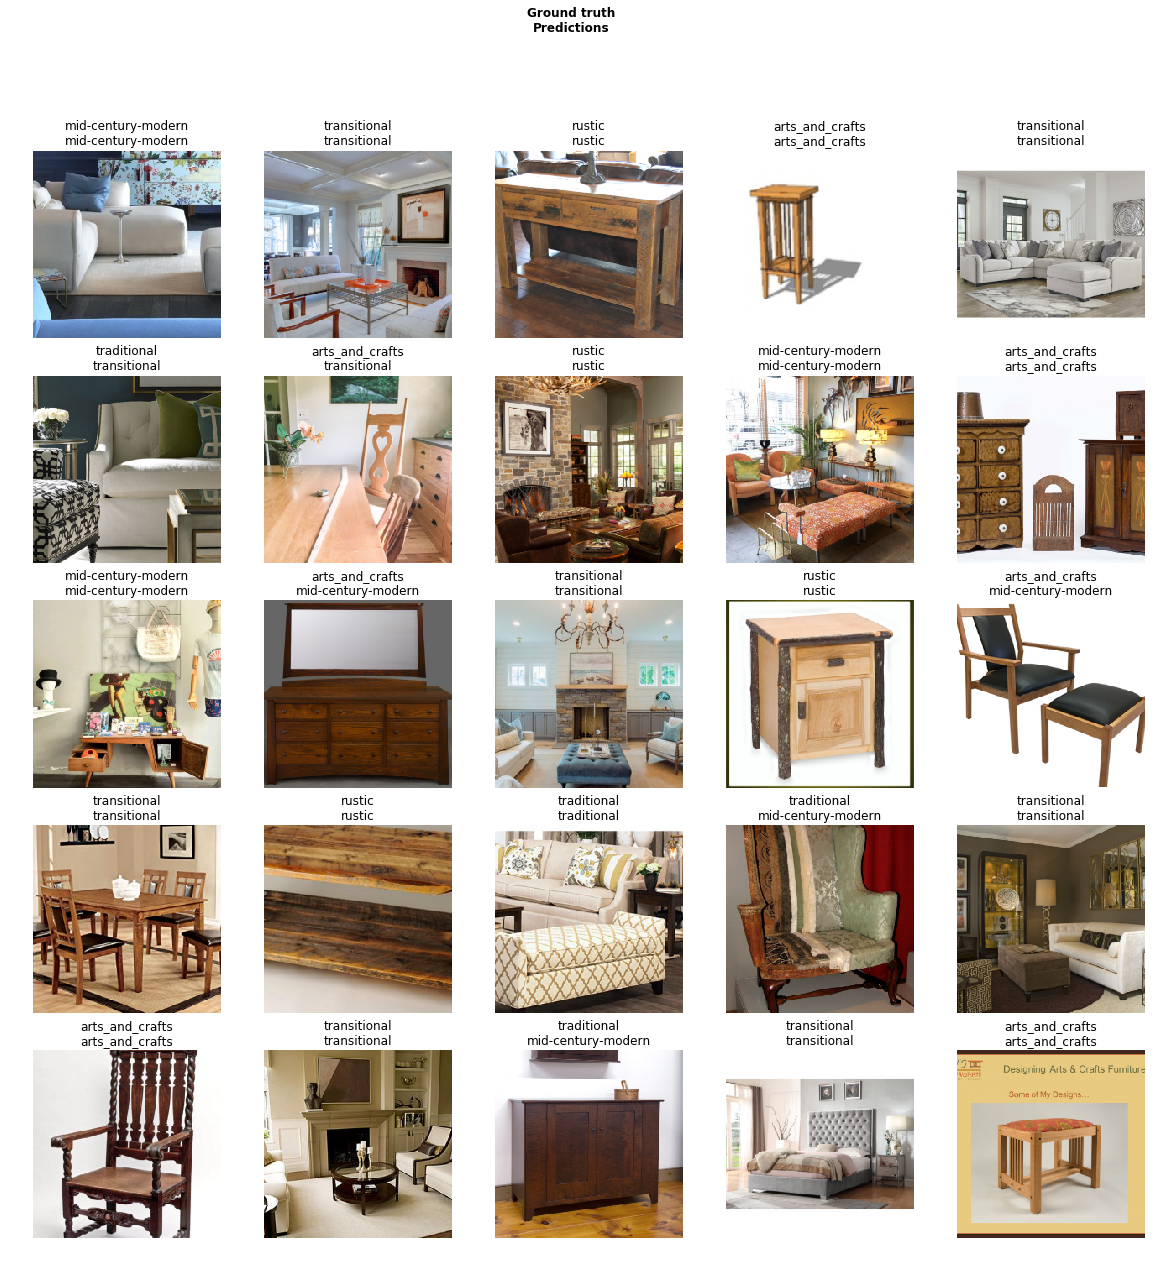

In [24]:
learn.show_results()

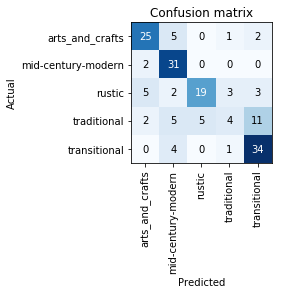

In [49]:
report = learn.interpret()
report.plot_confusion_matrix()


In [30]:
report.most_confused()

[('traditional', 'transitional', 11),
 ('arts_and_crafts', 'mid-century-modern', 5),
 ('rustic', 'arts_and_crafts', 5),
 ('traditional', 'mid-century-modern', 5),
 ('traditional', 'rustic', 5),
 ('transitional', 'mid-century-modern', 4),
 ('rustic', 'traditional', 3),
 ('rustic', 'transitional', 3),
 ('arts_and_crafts', 'transitional', 2),
 ('mid-century-modern', 'arts_and_crafts', 2),
 ('rustic', 'mid-century-modern', 2),
 ('traditional', 'arts_and_crafts', 2),
 ('arts_and_crafts', 'traditional', 1),
 ('transitional', 'traditional', 1)]

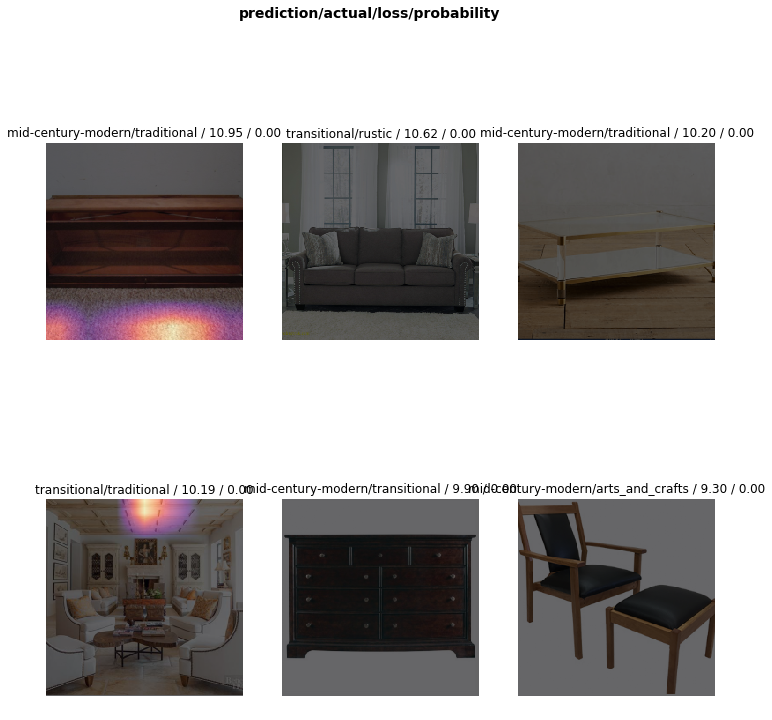

In [50]:
report.plot_top_losses(k = 6)